<a href="https://colab.research.google.com/github/zeeshan8595/Cardiovascular_Risk_Prediction/blob/main/Capstone_3_cardiovascular_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('data_cardiovascular_risk.csv')

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.size

57630

In [ ]:
df.shape

(3390, 17)

In [ ]:
df.dtypes # the data types of each feature

id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [ ]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


## Handling the Null Values

In [ ]:
df.isnull().sum() # null values feature wise

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

C:\Users\d\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


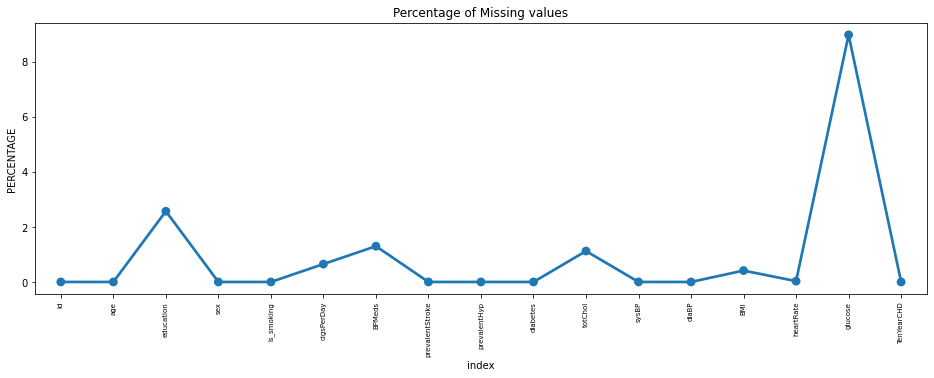

In [ ]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [ ]:
df.isnull().sum().sum() # total null values in the dataset


510

In [ ]:
# 1. education -- we will consider first with 87 null values

df.education.value_counts(normalize=True)

# there are 1-4 categories since 42% has class 1 education so we can take mode value to fill the null value for this feature

#though the feature seems to be of floating type but this is a categorical feature with 4 classes so we will take mode

1.0    0.421132
2.0    0.299728
3.0    0.166213
4.0    0.112928
Name: education, dtype: float64

In [ ]:
mode = df['education'].mode().values[0]
df['education'].fillna(value=mode, inplace=True)

In [ ]:
df['education'].isnull().sum()

0

In [ ]:
#2. cigsPerDay is the feature with 22 NaN values lets see the Feature

df['cigsPerDay'].value_counts(normalize=True) # its a contineous feature

# 50% are Non Smokers so we will consider these 22 recored as Non Smokers

0.0     0.505641
20.0    0.179929
30.0    0.052257
15.0    0.051069
10.0    0.031473
9.0     0.030879
5.0     0.030582
3.0     0.023456
40.0    0.018409
1.0     0.014252
25.0    0.013064
43.0    0.012470
35.0    0.005048
2.0     0.005048
6.0     0.004157
8.0     0.002969
7.0     0.002375
60.0    0.002375
18.0    0.002078
4.0     0.002078
50.0    0.001781
17.0    0.001485
23.0    0.001485
11.0    0.001188
12.0    0.000891
13.0    0.000891
19.0    0.000594
16.0    0.000594
45.0    0.000594
14.0    0.000297
70.0    0.000297
38.0    0.000297
Name: cigsPerDay, dtype: float64

In [ ]:
df['cigsPerDay'].fillna(0,inplace=True)

In [ ]:
df['cigsPerDay'].isnull().sum()

0

In [ ]:
# 3. BPMeds 

df['BPMeds'].value_counts(normalize=True)
#more than 97% are not on BP medication and almost 3% are on medication

0.0    0.970114
1.0    0.029886
Name: BPMeds, dtype: float64

In [ ]:
df['BPMeds'].isnull().sum() #44 NaN values

44

In [ ]:
df['BPMeds'].fillna(0,inplace=True)

In [ ]:
df['BPMeds'].isnull().sum()

0

In [ ]:
#4. totChol -- these are cholestrol levels 
df['totChol'].value_counts()

240.0    65
210.0    51
220.0    48
260.0    46
232.0    45
         ..
137.0     1
113.0     1
392.0     1
353.0     1
364.0     1
Name: totChol, Length: 240, dtype: int64

In [ ]:
df['totChol'].mode()

0    240.0
dtype: float64

In [ ]:
df['totChol'].mean()

237.07428400954655

In [ ]:
df['totChol'].median()

234.0

In [ ]:
# we can fill with mean value

chol_mean=df['totChol'].mean()
df['totChol'].fillna(chol_mean,inplace=True)

In [ ]:
df['BPMeds'].isnull().sum()

0

In [ ]:
df['BMI'].value_counts()

22.91    17
22.54    16
22.19    15
23.48    12
25.09    12
         ..
19.54     1
19.87     1
35.01     1
21.29     1
31.09     1
Name: BMI, Length: 1259, dtype: int64

In [ ]:
BMI_mean=df['BMI'].mean()

In [ ]:
df['BMI'].fillna(BMI_mean,inplace=True)

In [ ]:
df['BMI'].isnull().sum()

0

In [ ]:
df['heartRate'].value_counts()

75.0     442
80.0     298
70.0     241
85.0     191
72.0     184
        ... 
47.0       1
143.0      1
51.0       1
140.0      1
97.0       1
Name: heartRate, Length: 68, dtype: int64

In [ ]:
hr_mean=round(df['heartRate'].mean(),0)

In [ ]:
df['heartRate'].fillna(hr_mean,inplace=True)

In [ ]:
df['glucose'].value_counts(normalize=True)

75.0     0.048283
83.0     0.043746
70.0     0.039857
77.0     0.039533
80.0     0.038237
           ...   
191.0    0.000324
119.0    0.000324
43.0     0.000324
256.0    0.000324
274.0    0.000324
Name: glucose, Length: 132, dtype: float64

In [ ]:
df['glucose'].mean()

82.08651976668827

In [ ]:
df['glucose'].median()

78.0

In [ ]:
df['glucose'].mode()

0    75.0
dtype: float64

In [ ]:
# all mean mode median are in normal range , we can replace them by mean

mean_glucose=df['glucose'].mean()

In [ ]:
df['glucose'].fillna(mean_glucose,inplace=True)

In [ ]:
df['glucose'].isnull().sum()

0

## all Null values treated!!

In [ ]:
df.isnull().sum().sum()

0

C:\Users\d\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


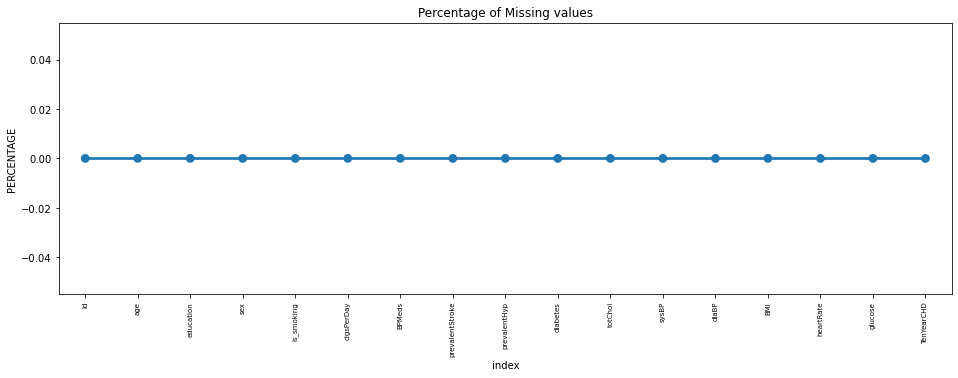

In [ ]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [ ]:
numeric_variables=['age','totChol','sysBP','diaBP','BMI','heartRate','glucose']

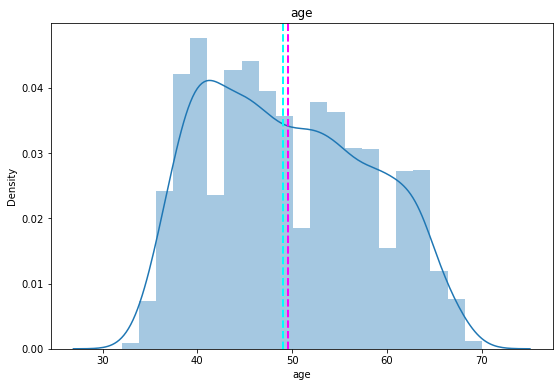

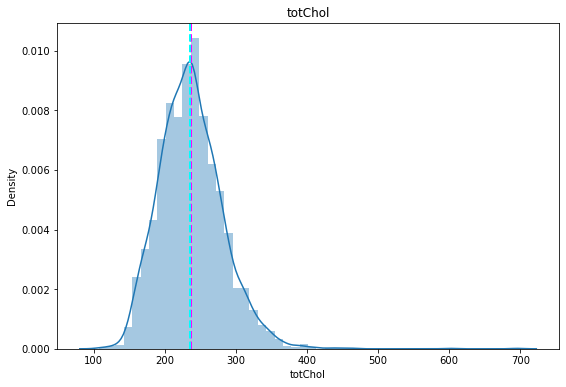

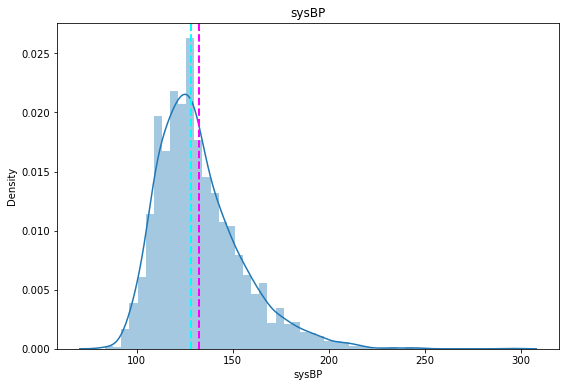

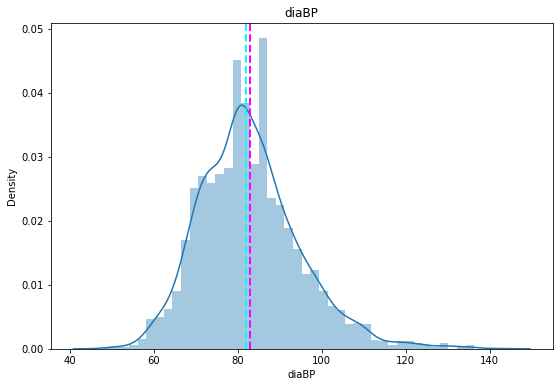

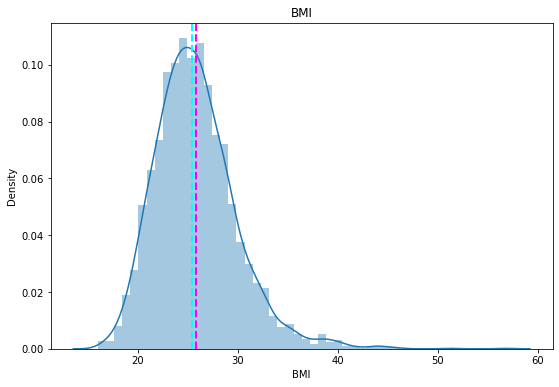

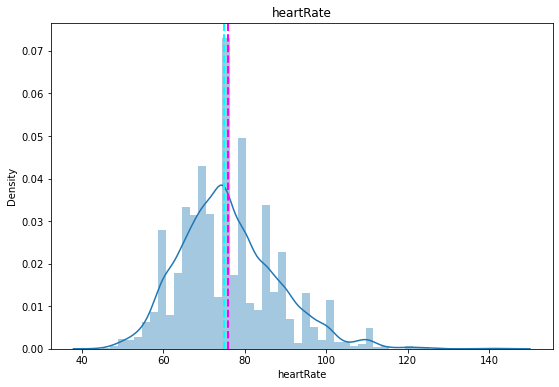

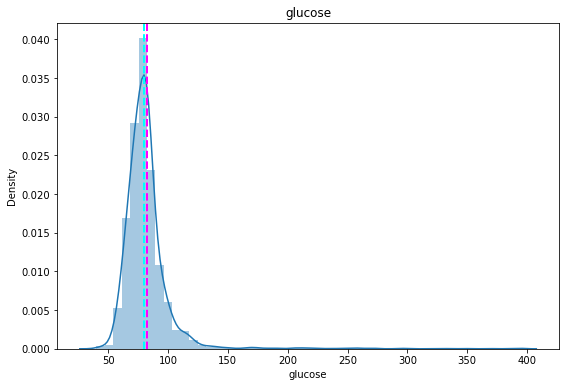

In [ ]:
# plot a distribution plot for each numerical feature 

for col in numeric_variables:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca() #Get Current Axis GCA and GCF get current figure
    feature = df[col]
    sns.distplot(feature)
    #feature.distplot(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

## all the numerical features follows normal distribution , we can observe that the mean and median values are very much close to each other in all numerical features


In [ ]:
cat_var=['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


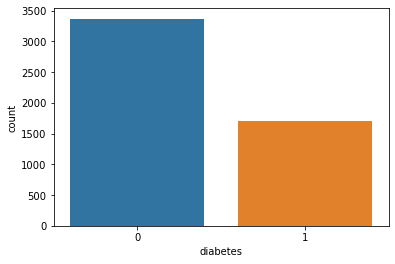

In [ ]:
for i,j in enumerate(cat_var):
    sns.countplot(df[j])

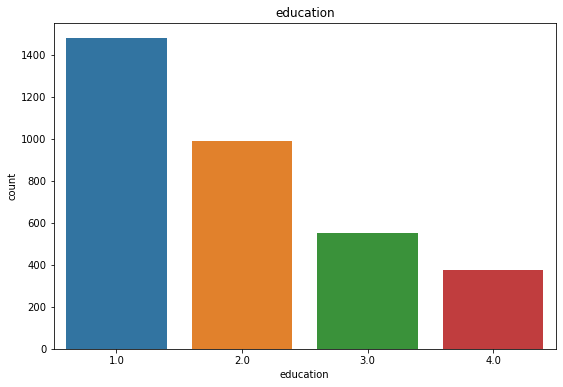

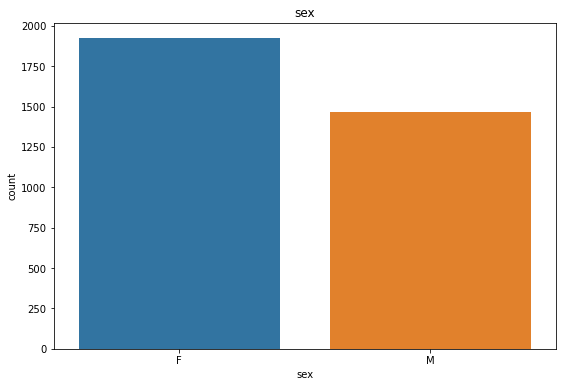

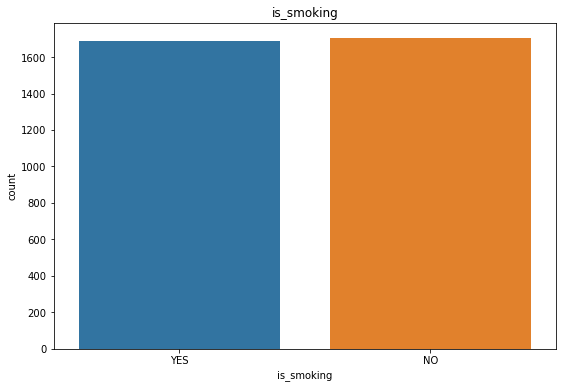

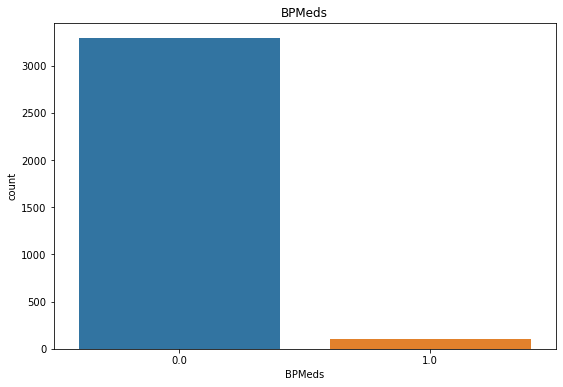

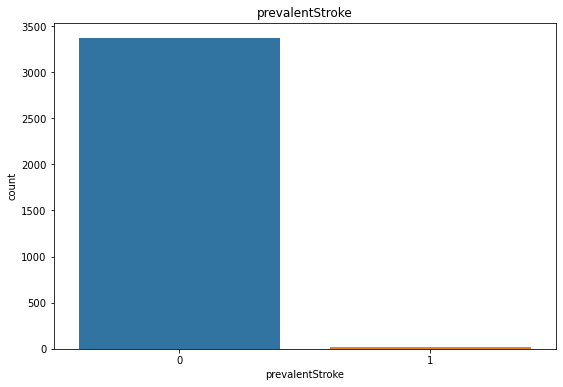

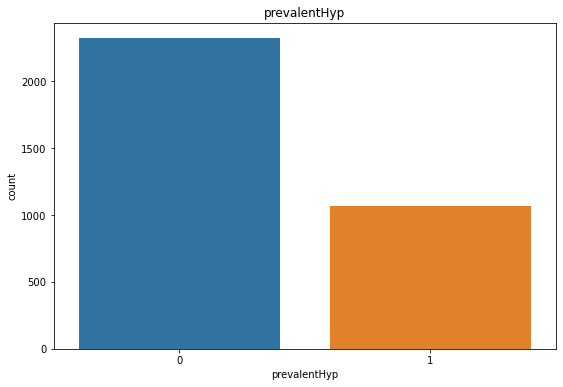

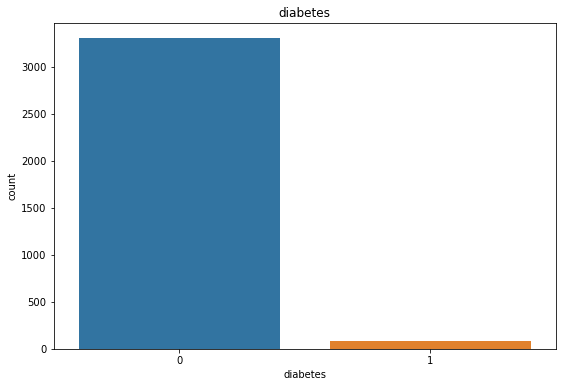

In [ ]:

for col in cat_var:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca() #Get Current Axis GCA and GCF get current figure
    feature = df[col]
    sns.countplot(feature)
    #feature.distplot(bins=50, ax = ax)
    #ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    #ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()